<a href="https://colab.research.google.com/github/mariabandeira/Reconhecimento-de-Digitos/blob/main/MiniProjeto_ML-3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

test_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/test_redu.csv'
train_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/train_redu.csv'

train_redu = pd.read_csv(train_redu_path, sep=';')
test_redu = pd.read_csv(test_redu_path, sep=';')

# 3.2 Classificação dos dígitos 1x5

## Filtragem dos dados

In [ ]:
scaler = MinMaxScaler()
# normalize dataset values (save labels)
#train_redu_labels = train_redu['label']
#test_redu_labels = test_redu['label']

train_redu_scaled = scaler.fit_transform(train_redu.drop('label', axis=1)) # ajusta e transforma
test_redu_scaled = scaler.transform(test_redu.drop('label', axis=1)) # apenas transforma (faz com que não haja vazamento de dados)

train_redu['i_normalizada'] = train_redu_scaled[:,0]
train_redu['s_normalizada'] = train_redu_scaled[:,1]

test_redu['i_normalizada'] = test_redu_scaled[:,0]
test_redu['s_normalizada'] = test_redu_scaled[:,1]

In [ ]:
train1x5 = train_redu[train_redu['label'].isin([1, 5])]
test1x5 = test_redu[test_redu['label'].isin([1, 5])]

In [ ]:
print(train1x5['label'].value_counts())
print(test1x5['label'].value_counts())

label
1    608
5    576
Name: count, dtype: int64
label
1    292
5    291
Name: count, dtype: int64


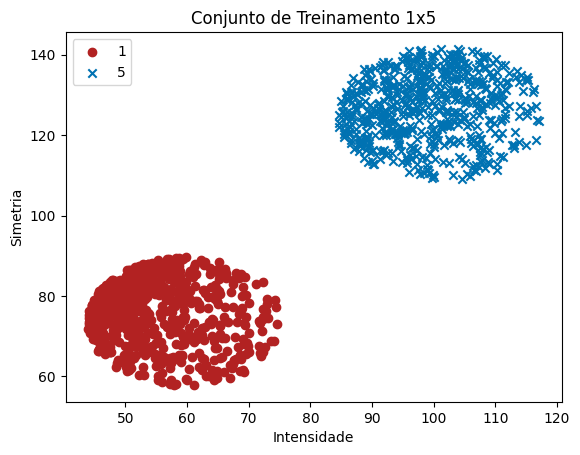

In [ ]:
plt.scatter(train1x5[train1x5['label'] == 1]['intensidade'],
            train1x5[train1x5['label'] == 1]['simetria'],
            c='firebrick', marker='o', label='1')  # Círculos azuis para a categoria 1

plt.scatter(train1x5[train1x5['label'] == 5]['intensidade'],
            train1x5[train1x5['label'] == 5]['simetria'],
            c='#0072B2', marker='x', label='5')  # Triângulos vermelhos para a categoria 5

plt.title('Conjunto de Treinamento 1x5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')

plt.legend()

plt.show()

In [ ]:
train1x5.reset_index(drop=True, inplace=True)
train1x5.head()

,label,intensidade,simetria,i_normalizada,s_normalizada
0,1,44.701961,69.270588,0.006349,0.110503
1,1,59.850980,83.443137,0.138219,0.247928
2,1,48.552941,79.043137,0.039872,0.205263
3,1,69.435294,72.878431,0.221649,0.145486
4,1,51.541176,84.611765,0.065884,0.259259


In [ ]:
test1x5.reset_index(drop=True, inplace=True)
test1x5.head()

,label,intensidade,simetria,i_normalizada,s_normalizada
0,1,51.639216,71.443137,0.066737,0.131569
1,1,51.674510,85.050980,0.067044,0.263518
2,1,44.847059,72.674510,0.007612,0.143509
3,1,50.760784,81.945098,0.059091,0.233402
4,1,57.788235,72.564706,0.120264,0.142444


In [ ]:
X_train1x5 = train1x5[['i_normalizada', 's_normalizada']].values
y_train1x5 = np.array([1 if y_ == 1 else -1 for y_ in train1x5['label']])

In [ ]:
X_test1x5 = test1x5[['i_normalizada', 's_normalizada']].values
y_test1x5 = np.array([1 if y_ == 1 else -1 for y_ in test1x5['label']]) # OBS: no pdf ele diz que o y é apenas o label

In [ ]:
def pred_digito(y):
  y = np.where(y == 1, 1, 5)
  return y

## Regressão Linear

In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = None

  def fit(self, _X, _y):
    N = len(_X)

    X = np.column_stack((np.ones((N, 1)), _X))

    xtx = X.T @ X
    inv = np.linalg.inv(xtx) @ X.T
    self.w = inv @ _y

  def predict(self, _x):
    X = np.column_stack((np.ones((len(_x), 1)), _x))
    return [np.dot(self.w, xn) for xn in X]

  def getW(self):
    return self.w

In [ ]:
class LRClassifier():
  def execute(self, _X, _y):
    lr = LinearRegression()
    lr.fit(_X, _y)
    self.w = lr.getW()

  def predict(self, X):
    N = len(X)
    X = np.column_stack((np.ones((N, 1)), X))
    return [np.sign(np.dot(self.w, xn)) for xn in X]

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

### Treino

In [ ]:
classifier = LRClassifier()
classifier.execute(X_train1x5, y_train1x5)

predictions = classifier.predict(X_train1x5)

In [ ]:
# Predição do Dígito com LRClassifier
pred = np.array(predictions)
pred = pred_digito(pred)
pred

array([1, 1, 1, ..., 5, 5, 5])

In [ ]:
lr = LinearRegression()
lr.fit(X_train1x5, y_train1x5)
y_pred = np.array(lr.predict(X_train1x5))
w = lr.getW()
print(w)

[ 1.54070954 -2.15454424 -2.17771687]


In [ ]:
# Predição do Dígito com LinearRegression
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred = pred_digito(y_pred)
y_pred

array([1, 1, 1, ..., 5, 5, 5])

In [ ]:
# utiliza reverse transform para plotar os dados normalizados (como originais)
# X_train com valores reais
X_train1x5_rev = scaler.inverse_transform(X_train1x5[:, 0:])
X_test1x5_rev = scaler.inverse_transform(X_test1x5[:, 0:])

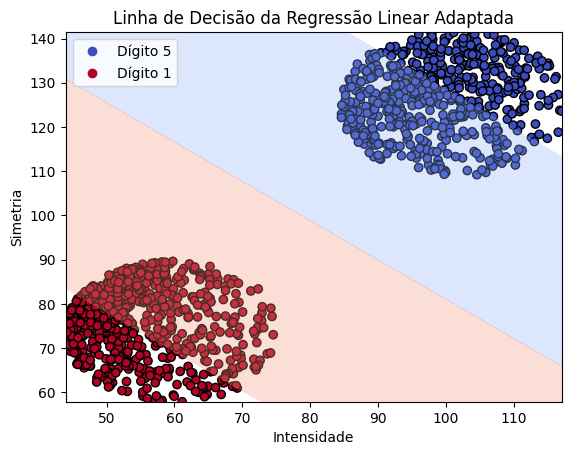

In [ ]:
# Plotar os dados e a linha de decisão com LinearRegression
plt.figure()
scatter = plt.scatter(X_train1x5_rev[:, 0], X_train1x5_rev[:, 1], c=y_train1x5, cmap='coolwarm', marker='o', edgecolor='k')

xx, yy = np.meshgrid(np.linspace(X_train1x5_rev[:, 0].min(), X_train1x5_rev[:, 0].max(), 500),
                     np.linspace(X_train1x5_rev[:, 1].min(), X_train1x5_rev[:, 1].max(), 500))

# adicionado normalização para xx e yy
xx_normalized = scaler.transform(np.c_[xx.ravel(), yy.ravel()])[:, 0]
yy_normalized = scaler.transform(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = np.array(lr.predict(np.c_[xx_normalized, yy_normalized]))
Z = Z.reshape(xx.shape)

#Z = np.array(lr.predict(np.c_[xx.ravel(), yy.ravel()]))
#Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=[-1, 0, 1])
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Linha de Decisão da Regressão Linear Adaptada')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()


### Teste

In [ ]:
predictions_test = classifier.predict(X_test1x5)
pred_test = np.array(predictions_test)
pred_test = pred_digito(pred_test)

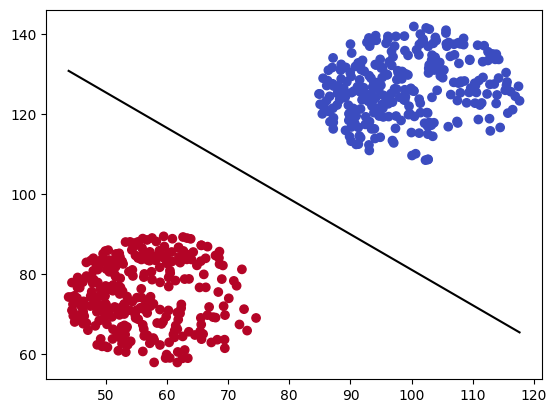

In [ ]:
# Plotagem da Regressão Linear com LRClassifier
plt.scatter(X_test1x5_rev[:, 0], X_test1x5_rev[:, 1], c=y_test1x5, cmap='coolwarm')

x = np.linspace(X_test1x5_rev[:, 0].min(), X_test1x5_rev[:, 0].max(), 100)

# normaliza para manter na mesma escalas dos dados de treinamento
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = classifier.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = classifier.getRegressionY(x)
plt.plot(x, y, color='black')
plt.show()

### Métricas de Aprendizado

In [ ]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train1x5)
eIn = 0
for i in range(N_in):
    if(y_pred[i] != train1x5['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test1x5)
eOut = 0
for i in range(N_out):
    if(pred_test[i] != test1x5['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.0
Eout = 0.0


In [ ]:
print(classification_report(train1x5['label'], y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



In [ ]:
print(classification_report(test1x5['label'], pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



[[608   0]
 [  0 576]]


<Axes: >

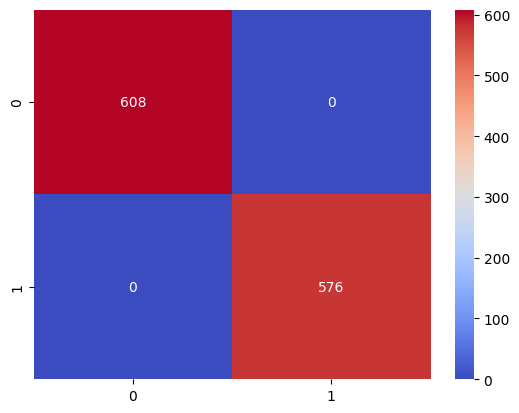

In [ ]:
cm_train = confusion_matrix(train1x5['label'], y_pred)
print(cm_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm')

[[292   0]
 [  0 291]]


<Axes: >

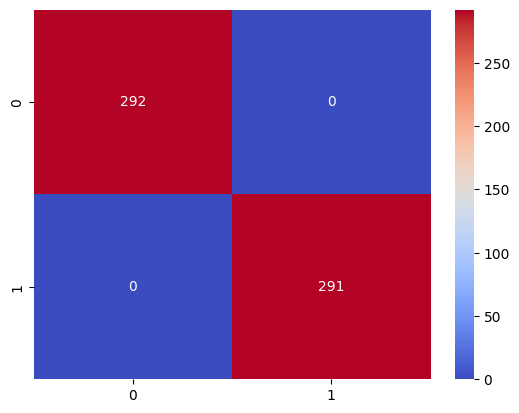

In [ ]:
cm_test = confusion_matrix(test1x5['label'], pred_test)
print(cm_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm')

## Perceptron

In [ ]:
class PocketPLA():
  def __init__(self):
    self.w = None

  def get_w(self):
    return self.w

  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    N = len(X)
    hasWrongClassifiedPoint = True
    bestError = len(y)

    self.w = np.zeros(len(X[0]))
    bestW = self.w
    for iter in range(N):

      #Testa se sign(wTXn) != Yn - ponto classificado errado
      for i in range(len(y)):
        if(np.sign(np.dot(self.w, X[i])) != y[i]):
          self.w = self.w + (y[i]*X[i])
          eIN = self.errorIN(X, y)
          if(bestError > eIN):
            bestError = eIN
            bestW = self.w
    self.w = bestW

  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]

  def h(self, x):
    return np.sign(np.dot(self.w, x))

  def errorIN(self, X, y):
    error = 0
    for i in range(len(y)):
      if(np.sign(np.dot(self.w, X[i])) != y[i]):
        error += 1

    return error

###  Treino

In [ ]:
# utiliza os dados normalizados (adicionando 1 para o bias)
X_train1x5_pla = np.column_stack((np.ones((len(X_train1x5), 1)), X_train1x5))

# dados do inverse transform (adicionando 1 para o bias)
X_train1x5_pla_rev = np.column_stack((np.ones((len(X_train1x5_rev), 1)), X_train1x5_rev))

In [ ]:
pla = PocketPLA()
pla.execute(X_train1x5_pla, y_train1x5)

In [ ]:
# Predição do Dígito com Pocket PLA
y_pla = []
for i in range(len(X_train1x5_pla)):
  y_pla.append(pla.h(X_train1x5_pla[i]))

y_pred_pla = pred_digito(np.array(y_pla))

In [ ]:
print('1: ', y_pla.count(1))
print('5: ', y_pla.count(-1))

1:  608
5:  576


In [ ]:
xmin = X_train1x5_pla_rev[:,1].min()
xmax = X_train1x5_pla_rev[:,1].max()
print(xmin, xmax)

43.97254901960784 117.10196078431372


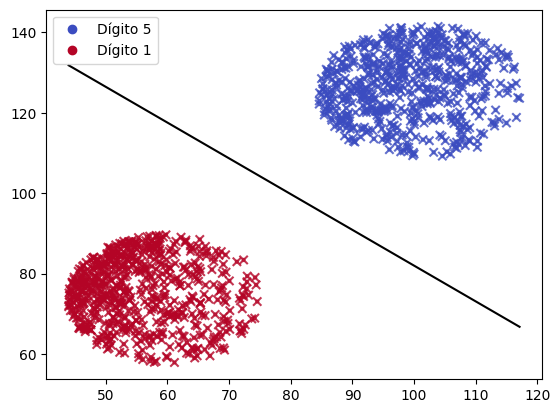

In [ ]:
# Plotagem do resultado para o Pocket PLA
plt.scatter(X_train1x5_pla_rev[:, 1], X_train1x5_pla_rev[:, 2], c=y_train1x5, cmap='coolwarm', marker='x', alpha=0.8)
plt.scatter(X_train1x5_pla_rev[:, 1], X_train1x5_pla_rev[:, 2], c=np.array(y_pla), cmap='coolwarm', s=5, alpha=0.5)

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla.getOriginalY(x)
plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

In [ ]:
pla.get_w()

array([ 1.        , -1.38233085, -1.39531523])

### Teste

In [ ]:
# utiliza os dados normalizados (adicionando 1 para o bias)
X_test1x5_pla = np.hstack((np.ones((len(X_test1x5), 1)), X_test1x5))

# dados do inverse transform (adicionando 1 para o bias)
X_test1x5_pla_rev = np.hstack((np.ones((len(X_test1x5_rev), 1)), X_test1x5_rev))

In [ ]:
# Predição do Dígito com Pocket PLA
pla_test = []
for i in range(len(X_test1x5_pla)):
  pla_test.append(pla.h(X_test1x5_pla[i]))

pred_pla_test = pred_digito(np.array(pla_test))

In [ ]:
xmin_test = X_test1x5_pla_rev[:,1].min()
xmax_test = X_test1x5_pla_rev[:,1].max()
print(xmin_test, xmax_test)

43.92549019607843 117.63921568627454


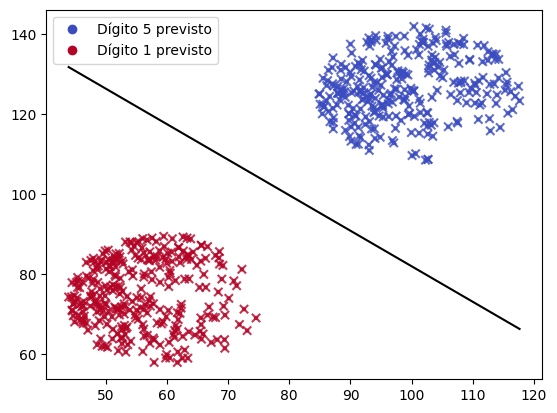

In [ ]:
# Plotagem do resultado para o Pocket PLA
plt.scatter(X_test1x5_pla_rev[:, 1], X_test1x5_pla_rev[:, 2], c=y_test1x5, cmap='coolwarm', marker='x', alpha=0.8)
plt.scatter(X_test1x5_pla_rev[:, 1], X_test1x5_pla_rev[:, 2], c=np.array(pla_test), cmap='coolwarm', s=5, alpha=0.6)


x = np.linspace(xmin_test, xmax_test, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla.getOriginalY(x)
plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5 previsto', 'Dígito 1 previsto'])
plt.show()

### Métricas de Aprendizado

In [ ]:
#Computando o erro dentro da amostra (Ein)
N_in = len(y_train1x5)
eIn = 0
for i in range(N_in):
    if(y_pla[i] != y_train1x5[i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(y_test1x5)
eOut = 0
for i in range(N_out):
    if(pla_test[i] != y_test1x5[i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.0
Eout = 0.0


In [ ]:
print(classification_report(y_train1x5.tolist(), y_pla))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



In [ ]:
print(classification_report(y_test1x5.tolist(), pla_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



In [ ]:
cm_train = confusion_matrix(y_train1x5.tolist(), y_pla)
print(cm_train)

[[576   0]
 [  0 608]]


<Axes: >

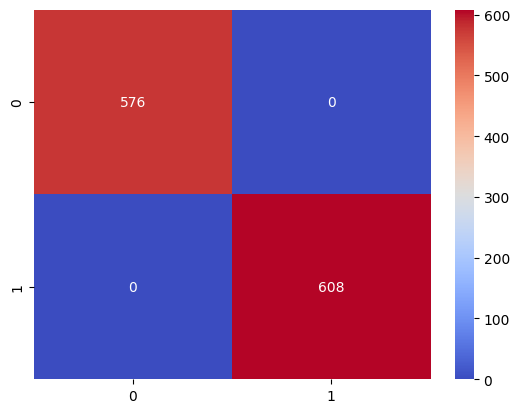

In [ ]:
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
cm_test = confusion_matrix(y_test1x5.tolist(), pla_test)
print(cm_test)

[[291   0]
 [  0 292]]


<Axes: >

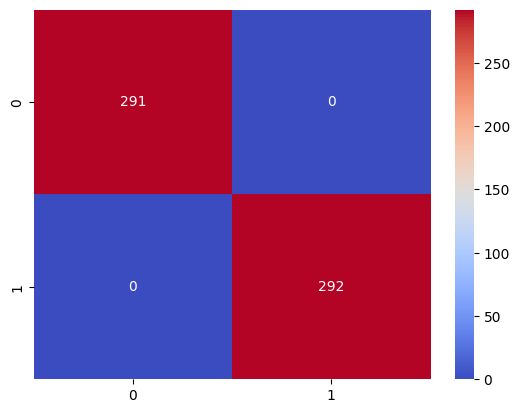

In [ ]:
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm')

## Regressão Logística

In [ ]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample

class LogisticRegression_:
  def __init__(self, eta=0.1, tmax=1000, bs=20):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = bs

  # Infere o vetor w da funçao hipotese
  #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
  def fit(self, _X, _y):
    X = np.array(_X)
    y = np.array(_y)

    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d, dtype=float)
    self.w = []

    for t in range(self.tmax):
        vsoma = np.zeros(d, dtype=float)

        # Seleciona um lote de dados aleatorios
        if self.batch_size < N:
            idx = random.sample(range(N), self.batch_size)
            batchX = [X[i] for i in idx]
            batchY = [y[i] for i in idx]
        else:
            batchX = X
            batchY = y

        # Calcula o gradiente da funcao de erro
        for xn, yn in zip(batchX, batchY):
            vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))

        grad_t = vsoma / len(batchY)
        # condição de parada
        if LA.norm(grad_t) < 0.0001:
            break

        w = w + (self.eta * grad_t)

    self.w = w

  #funcao hipotese inferida pela regressa logistica
  def predict_prob(self, X):
    s = np.dot(X, self.w)
    prob = np.exp(s) / (1 + np.exp(s))
    return prob

  #Predicao por classificação linear
  def predict(self, X):
    prob = self.predict_prob(X)
    y = np.where(prob >= 0.5, 1, -1)
    return y

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

### Treino

In [ ]:
# utiliza os dados normalizados
X_train1x5_log = np.column_stack((np.ones((len(X_train1x5), 1)), X_train1x5))

# dados do inverse transform
X_train1x5_log_rev = np.column_stack((np.ones((len(X_train1x5_rev), 1)), X_train1x5_rev))

In [ ]:
LR = LogisticRegression_(0.1, 1000)
LR.fit(X_train1x5_log, y_train1x5)
pred_logistic = LR.predict_prob(X_train1x5_log)

In [ ]:
digits_logistic_train = LR.predict(X_train1x5_log)

In [ ]:
digits_logistic_train

array([ 1,  1,  1, ..., -1, -1, -1])

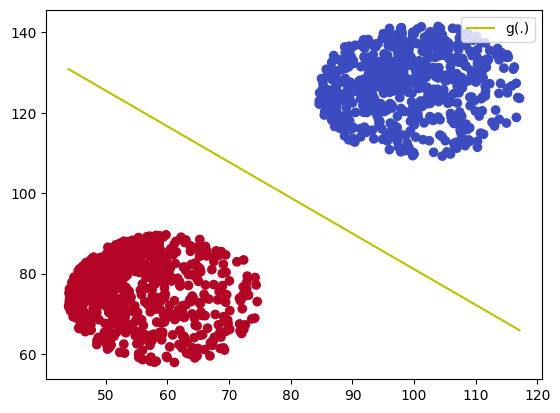

In [ ]:
#desenha a reta inferida pela regressao logistica
xmin = X_train1x5_log_rev[:,1].min()
xmax = X_train1x5_log_rev[:,1].max()

xRL = np.linspace(xmin, xmax, 100)

x_normalized = scaler.transform(np.column_stack((xRL, np.zeros_like(xRL))))[:, 0]
y_normalized = [classifier.getRegressionY(xn) for xn in x_normalized]

yRL = scaler.inverse_transform(np.column_stack((xRL, y_normalized)))[:, 1]
#xRL = [xmin, xmax]
#yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]

plt.scatter(X_train1x5_log_rev[:, 1], X_train1x5_log_rev[:, 2], c=y_train1x5, cmap='coolwarm')
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

### Teste

In [ ]:
# utiliza os dados normalizados
X_test1x5_log = np.column_stack((np.ones((len(X_test1x5), 1)), X_test1x5))

# dados do inverse transform
X_test1x5_log_rev = np.column_stack((np.ones((len(X_test1x5_rev), 1)), X_test1x5_rev))

In [ ]:
pred_logistic_test = LR.predict_prob(X_test1x5_log)

In [ ]:
digits_logistic_test = (LR.predict(X_test1x5_log))

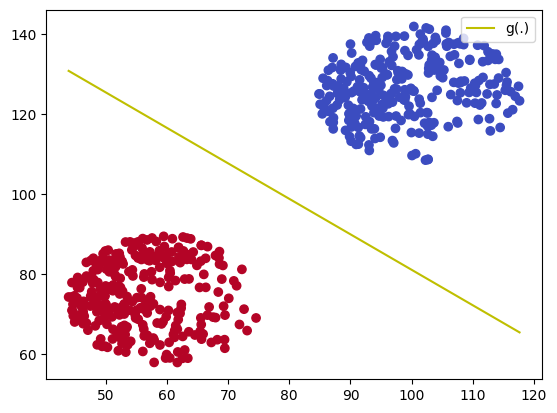

In [ ]:
#desenha a reta inferida pela regressao logistica
xmin = X_test1x5_log_rev[:,1].min()
xmax = X_test1x5_log_rev[:,1].max()

xRL = np.linspace(xmin, xmax, 100)

x_normalized = scaler.transform(np.column_stack((xRL, np.zeros_like(xRL))))[:, 0]
y_normalized = [classifier.getRegressionY(xn) for xn in x_normalized]

yRL = scaler.inverse_transform(np.column_stack((xRL, y_normalized)))[:, 1]

#yRL = [classifier.getRegressionY(xmin_test), classifier.getRegressionY(xmax_test)]
plt.scatter(X_test1x5_log_rev[:, 1], X_test1x5_log_rev[:, 2], c=y_test1x5, cmap='coolwarm')
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

### Métricas de Aprendizado

In [ ]:
#Computando o erro dentro da amostra (Ein)
N_in = len(y_train1x5)
eIn = 0
for i in range(N_in):
    if(digits_logistic_train[i] != y_train1x5[i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(y_test1x5)
eOut = 0
for i in range(N_out):
    if(digits_logistic_test[i] != y_test1x5[i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.0
Eout = 0.0


In [ ]:
print(classification_report(y_train1x5.tolist(), digits_logistic_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



In [ ]:
print(classification_report(y_test1x5.tolist(), digits_logistic_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



<Axes: >

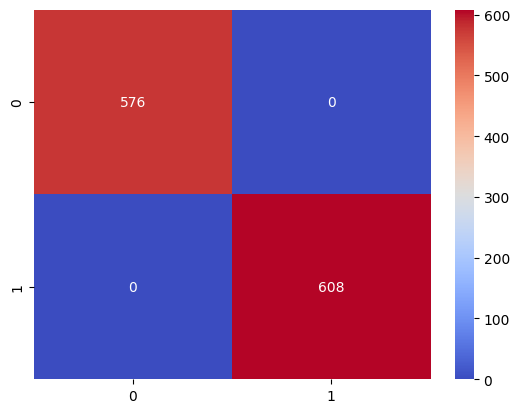

In [ ]:
cm_train = confusion_matrix(y_train1x5.tolist(), digits_logistic_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm')

<Axes: >

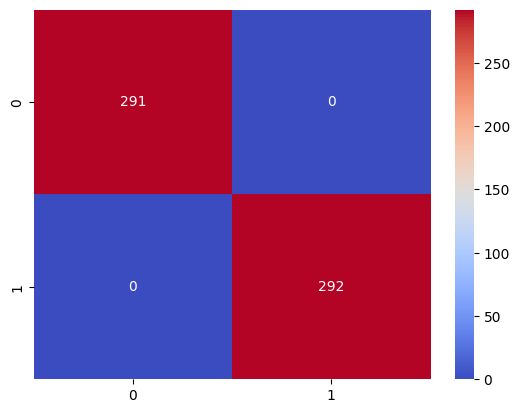

In [ ]:
cm_test = confusion_matrix(y_test1x5, digits_logistic_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm')